## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Process Data

In [2]:
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [56]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


## Interaction EDA

In [28]:
for col in df.columns:
    print(col)
    print(df[col].unique())

destination
['No Urgent Place' 'Home' 'Work']
passanger
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather
['Sunny' 'Rainy' 'Snowy']
temperature
[55 80 30]
time
['2PM' '10AM' '6PM' '7AM' '10PM']
coupon
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
expiration
['1d' '2h']
gender
['Female' 'Male']
age
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
maritalStatus
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
has_children
[1 0]
education
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
occupation
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [48]:
test = df.groupby(['destination', 'passanger']).mean()['Y'].reset_index().pivot(index='destination', columns='passanger', values='Y')

In [49]:
test.min().min()

0.40441176470588236

<AxesSubplot:xlabel='toCoupon_GEQ15min', ylabel='destination'>

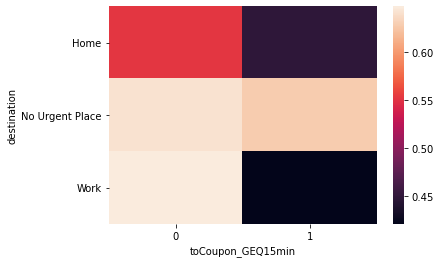

In [31]:
sns.heatmap(df.groupby(['destination', 'toCoupon_GEQ15min']).mean()['Y'].reset_index().pivot(index='destination', columns='toCoupon_GEQ15min', values='Y'))

In [9]:
type(df['destination'])

pandas.core.series.Series

In [10]:
type(df['passanger'])

pandas.core.series.Series

In [11]:
df['destination'].shape

(12684,)

In [12]:
df['passanger'].shape

(12684,)

In [42]:
## function to return top pair to investigate
def top_pair(df):
    pair = []
    range_ = []
    for ind1, col1 in enumerate(df.iloc[:, :-1]):
        for ind2, col2 in enumerate(df.iloc[:, :-1]):
            if ind1 > ind2:
                interaction = df.groupby([col1, col2])\
                                .mean()['Y']\
                                .reset_index()\
                                .pivot(index=col1, columns=col2, values='Y')
                pair.append((col1, col2))
                range_.append(interaction.max().max() - interaction.min().min())
    df2 = pd.DataFrame({'pair': pair, 'range': range_}).sort_values(by=['range'], ascending=False)
    return df2
                

In [47]:
df_pair = top_pair(df)

In [45]:
def inter_plot(col1, col2):
    sns.heatmap(df.groupby([col1, col2]).mean()['Y'].reset_index().pivot(index=col1, columns=col2, values='Y'))
    plt.show()

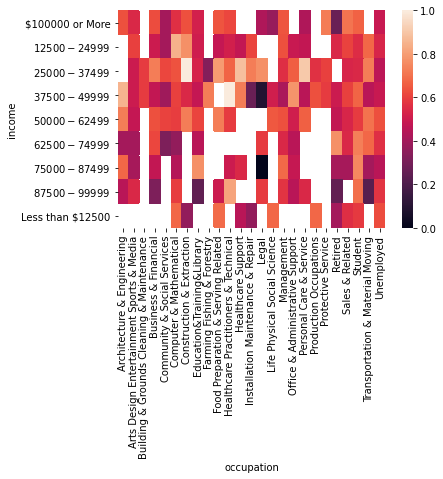

In [46]:
inter_plot('income', 'occupation')

In [51]:
df_pair.head(15)

,pair,range
91,"(car, destination)",1.000000
67,"(occupation, passanger)",1.000000
96,"(car, coupon)",1.000000
183,"(Restaurant20To50, occupation)",1.000000
90,"(income, occupation)",1.000000
132,"(CoffeeHouse, occupation)",0.954545
117,"(Bar, occupation)",0.909091
92,"(car, passanger)",0.875000
186,"(Restaurant20To50, Bar)",0.857143
71,"(occupation, coupon)",0.833333


1.0


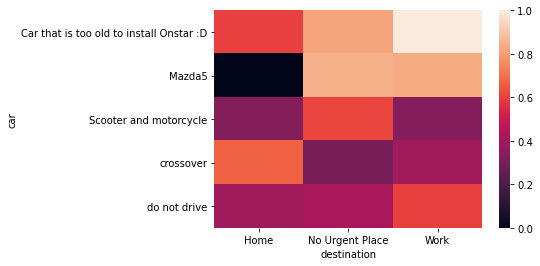

1.0


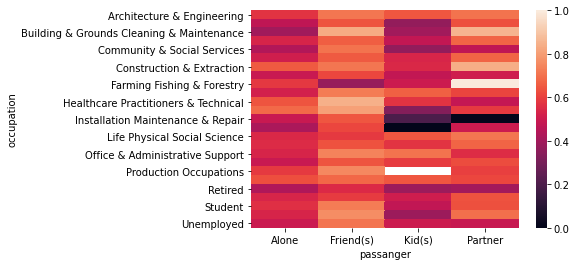

1.0


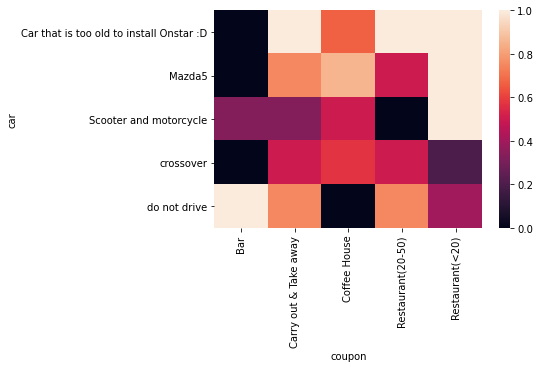

1.0


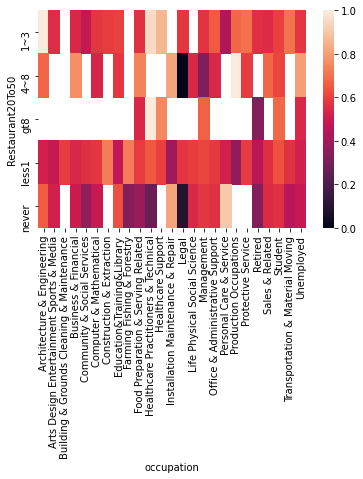

1.0


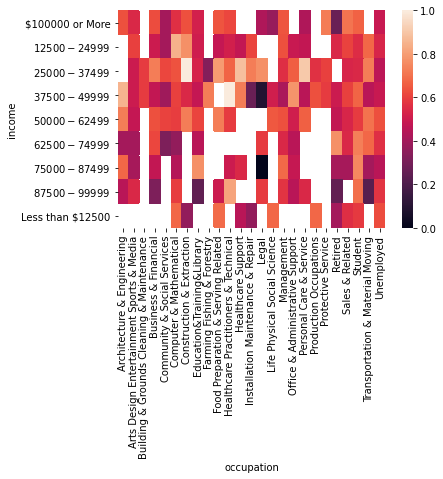

0.9545454545454546


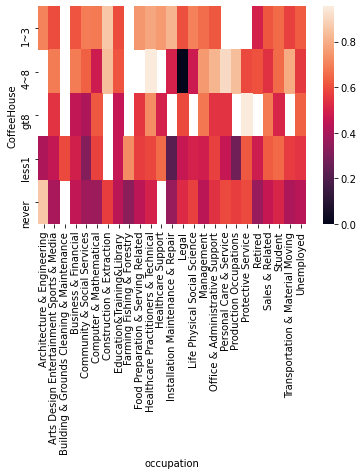

0.9090909090909091


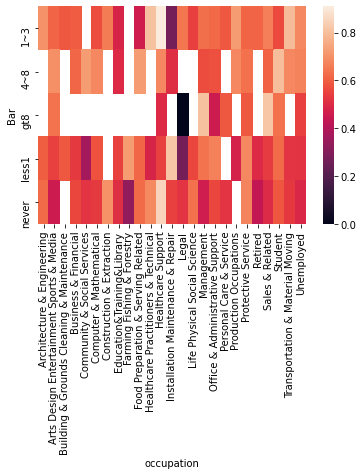

0.875


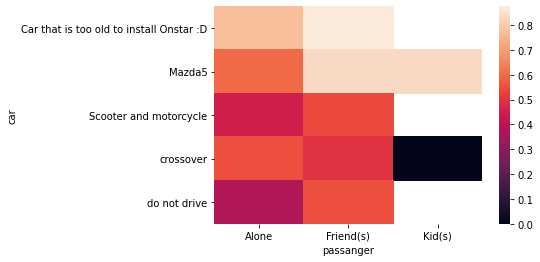

0.8571428571428571


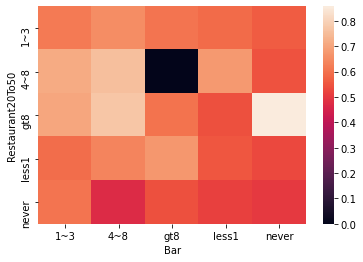

0.8333333333333334


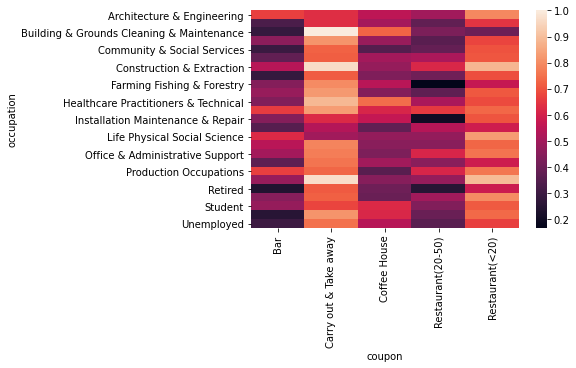

0.8235294117647058


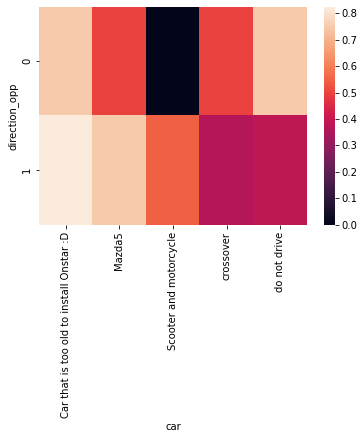

0.8235294117647058


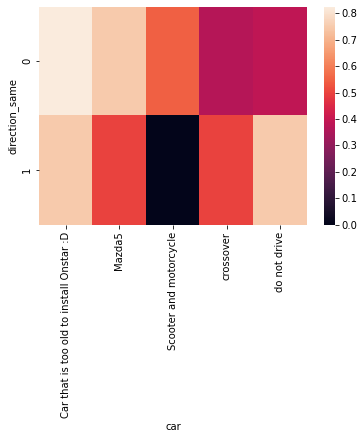

0.8181818181818182


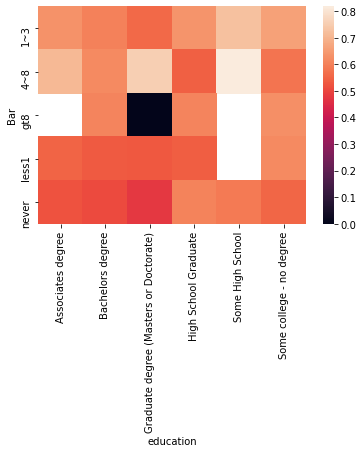

0.8181818181818181


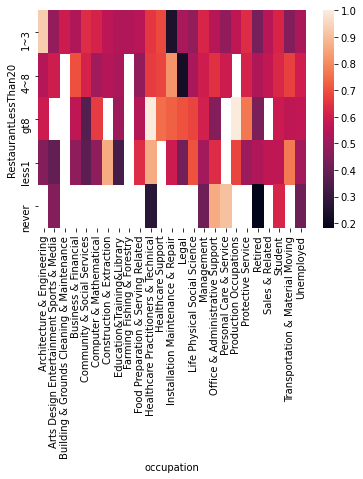

0.8181818181818181


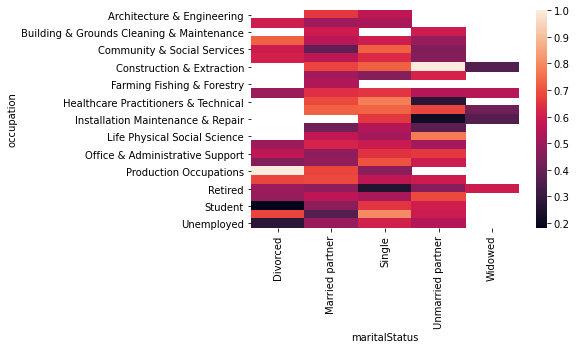

In [55]:
for _, row in df_pair.head(15).iterrows():
    print(row['range'])
    inter_plot(row['pair'][0], row['pair'][1])